In [27]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Make sure pandas is imported if not already
import numpy as np # Make sure numpy is imported if not already


In [29]:
# Simply import the new dataset created from the EDA
df = pd.read_csv('df_engineered_desktop_pc.csv')

In [30]:
print(df.head())
print(df.info())
print(df.describe())

                                              titulo tipo_de_producto  \
0                           Apple Mac mini M4 [2024]          Mini PC   
1                Apple Mac mini M4 [2024]\nMU9D3YP/A          Mini PC   
2  Ankermann Business Work V2 PC (4260561746335) ...    PC multimedia   
3                   Zone Evil ZE-160937\nZE-160937-H        PC gaming   
4                    Adonia Gaming R7 5800X RTX 4060        PC gaming   

                     serie            procesador  \
0           Apple Mac Mini               Unknown   
1           Apple Mac Mini              Apple M4   
2  Ankermann Business Work     AMD Ryzen 5 5600G   
3                Zone Evil  Intel Core i5-13400F   
4            Adonia Gaming     AMD Ryzen 7 5800X   

  disco_duro_tipo_de_disco_duro procesador_fabricante procesador_tipo  \
0                disco duro SSD                 Intel         Apple M   
1                disco duro SSD                 Apple         Apple M   
2            disco duro M.2 S

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   titulo                                        3936 non-null   object 
 1   tipo_de_producto                              3936 non-null   object 
 2   serie                                         3936 non-null   object 
 3   procesador                                    3936 non-null   object 
 4   disco_duro_tipo_de_disco_duro                 3936 non-null   object 
 5   procesador_fabricante                         3936 non-null   object 
 6   procesador_tipo                               3936 non-null   object 
 7   disco_duro_numero_de_discos_duros_instalados  3936 non-null   float64
 8   sistema_operativo_sistema_operativo           3936 non-null   object 
 9   procesador_nombre_clave                       3936 non-null   o

In [32]:
# PLEASE ADJUST THESE LISTS BASED ON YOUR ACTUAL df_engineered.csv columns
numerical_features = [] # e.g., ['CPU_Speed', 'RAM_Size', 'Storage_Size', 'Screen_Size', 'some_engineered_numeric_feature']
categorical_features = [] # e.g., ['Brand', 'Type', 'some_engineered_categorical_feature']
target_variable = 'precio_mean' # Assuming 'Price' is the column name for the price

# Separate features (X) and target (y)
# Drop rows where the target variable might be NaN, if any
df.dropna(subset=[target_variable], inplace=True)
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Identify actual numerical and categorical features present in X
# This is a safeguard in case the predefined lists don't perfectly match available columns
actual_numerical_features = [col for col in numerical_features if col in X.columns]
actual_categorical_features = [col for col in categorical_features if col in X.columns]

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, actual_numerical_features),
    ('categorical', categorical_pipeline, actual_categorical_features)
], remainder='passthrough') # 'passthrough' will keep any columns not specified in transformers

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor on the training data and transform both training and testing data
# This ensures that the same transformations are applied consistently
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after transformation (important for understanding processed data)
# This can be a bit tricky with ColumnTransformer, especially with 'passthrough'
# For one-hot encoded features:
try:
    onehot_feature_names = preprocessor.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(actual_categorical_features)
except AttributeError: # Older scikit-learn versions might not have get_feature_names_out
     onehot_feature_names = [] # Fallback or handle appropriately

# For remainder='passthrough' columns:
remainder_feature_names = [col for col in X.columns if col not in actual_numerical_features and col not in actual_categorical_features]

# Combine all feature names
processed_feature_names = list(actual_numerical_features) + list(onehot_feature_names) + list(remainder_feature_names)

# Convert processed arrays back to DataFrames (optional, but good for inspection)
X_train_processed_df = pd.DataFrame(X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed, columns=processed_feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed.toarray() if hasattr(X_test_processed, "toarray") else X_test_processed, columns=processed_feature_names)

print("Shape of processed training data:", X_train_processed_df.shape)
print("Shape of processed testing data:", X_test_processed_df.shape)
print("First 5 rows of processed training data:")
print(X_train_processed_df.head())


Shape of processed training data: (3148, 36)
Shape of processed testing data: (788, 36)
First 5 rows of processed training data:
                                          titulo tipo_de_producto  \
0        Intel NUC Kit\nNUC6i5SYK (BOXNUC6I5SYK)          Mini PC   
1  Vibox V-112 Gaming PC Ryzen 5 4500 / RTX 3070        PC gaming   
2           Blackview MP80\nN5095 + 16GB + 512GB          Mini PC   
3             Lenovo ThinkCentre M75q Gen 2 Tiny    PC de oficina   
4                 ASUS U500MA\nU500MA-75700G0090    PC multimedia   

                serie           procesador disco_duro_tipo_de_disco_duro  \
0           Intel NUC  Intel Core i5-6260U                disco duro SSD   
1               Vibox     AMD Ryzen 5 4500                disco duro SSD   
2           Blackview  Intel Celeron N5095            disco duro M.2 SSD   
3  Lenovo ThinkCentre              Unknown                disco duro SSD   
4                ASUS    AMD Ryzen 7 5700G                disco duro SSD   


In [33]:
# Cell 3: Feature Selection and Preprocessing
# Ensure previous cells have loaded df and imported necessary libraries:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# import matplotlib.pyplot as plt
# import seaborn as sns
# df = pd.read_csv('/Users/blancavaldes/Desktop/PcPartPicker3000/assignment/df_engineered.csv')

# Based on your df.info(), selecting features with high non-null counts primarily
# selected_numerical_features = [
#     'procesador_frecuencia_turbo_max_ghz'
#     'procesador_numero_nucleos'
#     'medidas_y_peso_profundidad_cm'
#     'medidas_y_peso_ancho_cm'
#     'procesador_cache_mb'
#     'ram_memoria_gb'
#     'ram_frecuencia_de_la_memoria_mhz', 
#     'disco_duro_capacidad_de_memoria_ssd_gb', 
#     'procesador_frecuencia_turbo_max_ghz', 
#     'equip_altavoces_estéreo', 
#     'equip_refrigeración_líquida',
#     'equip_usb_c' 
# ]

# selected_categorical_features = [
#     'procesador'
#     'grafica_tarjeta'
#     'tipo_de_producto'
#     'disco_duro_tipo_de_disco_duro'
#     'procesador_fabricante'
#     'procesador_tipo'
#     'sistema_operativo_sistema_operativo', # 7914 non-null
#     'ram_tipo', # 7914 non-null
#     'grafica_memoria_mb', # 7914 non-null
#     'comunicaciones_estandar_lan', # 7914 non-null
#     'tipo', # 7914 non-null (Please verify if this is distinct and useful alongside tipo_de_producto)
#     'custom_category', # 7914 non-null
# ]

target_variable = 'precio_mean'

# Based on your df.info(), selecting features with high non-null counts primarily
selected_numerical_features = [
    'procesador_frecuencia_turbo_max_ghz',
    'procesador_numero_nucleos',
    'disco_duro_capacidad_de_memoria_ssd_gb',
    'ram_memoria_gb',
    'ram_frecuencia_de_la_memoria_mhz',
    # 'alimentacion_vatios_hora'
]

selected_categorical_features = [
    'procesador',
    'procesador_tipo',
    'grafica_tarjeta',
    'ram_tipo',
    'sistema_operativo_sistema_operativo',
    'alimentacion_wattage_binned',
    # 'camara_resolucion_pixeles',
    # 'pantalla_tecnologia',
    # 'pantalla_resolucion_pixeles'
]

# --- Data Cleaning ---
# Ensure target_variable is not NaN
df.dropna(subset=[target_variable], inplace=True)

all_features_for_model = selected_numerical_features + selected_categorical_features

# Drop rows where ANY of these selected features are NaN
# This is a strict approach. Imputation would be better for features with many NaNs if those features are crucial.
print(f"Dataset size before dropping NaNs in selected features: {len(df)}")
df_cleaned = df.dropna(subset=all_features_for_model).copy() # Use .copy() to avoid SettingWithCopyWarning
print(f"Dataset size after dropping NaNs in selected features: {len(df_cleaned)}")

if df_cleaned.empty:
    raise ValueError("DataFrame is empty after dropping NaNs from selected features. Consider imputing missing values or using features with fewer NaNs. Check the non-null counts of your selected features.")

X = df_cleaned[all_features_for_model]
y = df_cleaned[target_variable]

# Create preprocessing pipelines
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, selected_numerical_features),
    ('categorical', categorical_pipeline, selected_categorical_features)
], remainder='drop') # Ensure only specified features are used

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --->>> POINT A: Save X_train (original features) HERE <<<---
# This X_train contains the original, un-processed features for the training set.
# This is what your Cloud Function will use to look up the details of the neighbors.
# Assuming 'df' was for a specific device type, e.g., laptop:
X_train.to_csv('X_train_original_for_knn_lookup_desktop.csv', index=False) 
print("Saved X_train_original_for_knn_lookup_desktop.csv")

# Fit preprocessor and transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# --->>> POINT B: Save the fitted preprocessor HERE <<<---
import joblib # Make sure joblib is imported at the top of your notebook
joblib.dump(preprocessor, 'preprocessor_desktop_knn.joblib')
print("Saved preprocessor_desktop_knn.joblib")

# Get feature names after transformation
processed_numerical_features = selected_numerical_features
try:
    processed_onehot_features = list(preprocessor.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(selected_categorical_features))
except Exception as e:
    print(f"Warning: Could not get feature names from OneHotEncoder automatically: {e}. Fallback might be needed if column names are incorrect.")
    # Fallback: Estimate number of one-hot columns if get_feature_names_out fails
    num_onehot_cols = X_train_processed.shape[1] - len(processed_numerical_features)
    processed_onehot_features = [f'onehot_feature_{i}' for i in range(num_onehot_cols)]

processed_feature_names = processed_numerical_features + processed_onehot_features

# Convert processed arrays back to DataFrames, including original index
if X_train_processed.shape[1] == len(processed_feature_names):
    X_train_processed_df = pd.DataFrame(X_train_processed, columns=processed_feature_names, index=X_train.index)
    X_test_processed_df = pd.DataFrame(X_test_processed, columns=processed_feature_names, index=X_test.index)
else:
    print(f"Warning: Shape mismatch. Processed features: {X_train_processed.shape[1]}, Names generated: {len(processed_feature_names)}")
    X_train_processed_df = pd.DataFrame(X_train_processed, index=X_train.index) # Create DataFrame without column names if mismatch
    X_test_processed_df = pd.DataFrame(X_test_processed, index=X_test.index)

print(f"\nOriginal X_train shape: {X_train.shape}") # Should reflect columns in all_features_for_model
print(f"Processed X_train_processed_df shape: {X_train_processed_df.shape}")
print(f"Original X_test shape: {X_test.shape}")
print(f"Processed X_test_processed_df shape: {X_test_processed_df.shape}")

if not X_train_processed_df.empty:
    print("\nFirst 5 rows of processed training data (X_train_processed_df):")
    print(X_train_processed_df.head())
else:
     print("\nWarning: Processed training data is empty or DataFrame creation failed. Check preprocessing steps and data integrity.")

Dataset size before dropping NaNs in selected features: 3936
Dataset size after dropping NaNs in selected features: 3936
Saved X_train_original_for_knn_lookup_desktop.csv
Saved preprocessor_desktop_knn.joblib

Original X_train shape: (3148, 11)
Processed X_train_processed_df shape: (3148, 517)
Original X_test shape: (788, 11)
Processed X_test_processed_df shape: (788, 517)

First 5 rows of processed training data (X_train_processed_df):
      procesador_frecuencia_turbo_max_ghz  procesador_numero_nucleos  \
2339                            -3.420241                  -1.497148   
3048                            -1.159463                  -0.723284   
1556                            -0.029074                  -1.110216   
1907                            -0.029074                  -0.336353   
578                             -0.217472                  -0.336353   

      disco_duro_capacidad_de_memoria_ssd_gb  ram_memoria_gb  \
2339                                0.225434       -0.383279  

In [34]:
# Cell 4: KNN for Price Prediction (KNeighborsRegressor)
knn_regressor = KNeighborsRegressor(n_neighbors=5) # Start with k=5, can be tuned

# Train the model using the processed training data
knn_regressor.fit(X_train_processed_df, y_train)

# Make predictions on the processed test data
y_pred_knn = knn_regressor.predict(X_test_processed_df)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"\nKNeighborsRegressor Performance:")
print(f"RMSE: {rmse_knn:.2f}")
print(f"R-squared: {r2_knn:.2f}")

# Display some actual vs. predicted prices
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price (KNN)': y_pred_knn})
print("\nSample Predictions:")
print(predictions_df.head())


KNeighborsRegressor Performance:
RMSE: 1149.78
R-squared: 0.38

Sample Predictions:
      Actual Price  Predicted Price (KNN)
1593       3079.74               3058.616
465         261.00                257.038
1615       2106.13               1775.440
490         482.76                523.538
1926       1234.34                954.798


In [35]:
# Cell 5: KNN for Finding Similar Items (NearestNeighbors)
# We use the same processed data (X_train_processed_df) to fit this model
# It learns the "locations" of all items in the feature space.
# n_neighbors will include the item itself, so if you want k *similar* items, use n_neighbors=k+1
nn_model = NearestNeighbors(n_neighbors=6, metric='minkowski') # k=5 similar items + itself
nn_model.fit(X_train_processed_df) # Fit on the training data representations

print("\nNearestNeighbors model fitted.")
print(f"Model will find the {nn_model.n_neighbors -1 } most similar items from the training set.")

# --->>> POINT C: Save the fitted nn_model HERE <<<---
joblib.dump(nn_model, 'nn_model_desktop.joblib')
print("Saved nn_model_desktop.joblib")


NearestNeighbors model fitted.
Model will find the 5 most similar items from the training set.
Saved nn_model_desktop.joblib


In [36]:
# Assuming Cell 6: Example Usage - Finding K-Best Offers
# Make sure the following are defined from previous cells:
# X_test_processed_df, X_train_processed_df, X_test, y_test,
# X_train, y_train, nn_model, knn_regressor

if not X_test_processed_df.empty and not X_train_processed_df.empty:
    # Take a sample item from the test set to find neighbors for
    sample_index_in_test_df = 0 # Or any other valid index from X_test_processed_df
    
    # Get the corresponding index in the original X_test (if using iloc for sample_index_in_test_df)
    original_X_test_index = X_test.index[sample_index_in_test_df]

    query_item_processed = X_test_processed_df.iloc[[sample_index_in_test_df]]
    query_item_original_features = X_test.loc[[original_X_test_index]] # Use .loc with original index
    query_item_actual_price = y_test.loc[original_X_test_index]

    print("\n======================================================================")
    print(f"QUERY ITEM (Original Test Set Index: {original_X_test_index})")
    print("----------------------------------------------------------------------")
    print("Original Features (Selected):")
    # Display a selection of features for the query item for context
    query_display_features = ['tipo_de_producto', 'procesador_fabricante', 'ram_memoria_gb', 
                              'disco_duro_capacidad_de_memoria_ssd_gb', 'procesador', 'grafica_tarjeta']
    for col in query_display_features:
        if col in query_item_original_features.columns:
            print(f"  {col}: {query_item_original_features[col].values[0]}")
        else:
            print(f"  {col}: (Not available in query item)")
    print(f"Actual Price: {query_item_actual_price:.2f}")
    print("======================================================================")

    # Find neighbors for the query item from the training set
    distances, indices_in_X_train_processed = nn_model.kneighbors(query_item_processed)
    
    # indices_in_X_train_processed are row numbers in X_train_processed_df (and thus X_train)
    # We need to map these back to the original indices of X_train if they differ
    neighbor_original_indices = X_train.index[indices_in_X_train_processed.flatten()]

    print(f"\n{nn_model.n_neighbors -1} MOST SIMILAR OFFERS (from training set)") # Assuming k includes the item itself if it were in train
    print("----------------------------------------------------------------------")
    
    neighbor_data_for_df = []
    # Key features to display for neighbors for quick comparison
    neighbor_display_features = ['tipo_de_producto', 'procesador_fabricante', 'ram_memoria_gb', 
                                 'disco_duro_capacidad_de_memoria_ssd_gb', 'procesador', 'grafica_tarjeta']


    for i, (original_idx, dist) in enumerate(zip(neighbor_original_indices, distances.flatten())):
        # Retrieve original features and actual price using the original index
        neighbor_original_subset = X_train.loc[original_idx] 
        neighbor_actual_price = y_train.loc[original_idx]
        
        # Get the processed version of this neighbor to predict its price with knn_regressor
        # We need to find the row in X_train_processed_df that corresponds to original_idx
        # If X_train_processed_df preserved original indices (recommended), this is direct:
        if original_idx in X_train_processed_df.index:
            neighbor_processed_features_for_pred = X_train_processed_df.loc[[original_idx]]
            neighbor_predicted_price = knn_regressor.predict(neighbor_processed_features_for_pred)[0]
        else:
            # Fallback if indices don't match - this indicates a potential issue in how processed DFs were made
            # For now, we'll mark predicted price as N/A
            print(f"Warning: Original index {original_idx} not found in X_train_processed_df. Cannot get KNN predicted price for this neighbor.")
            neighbor_predicted_price = np.nan 
        
        neighbor_info = {
            'Rank': i + 1, # If nn_model.kneighbors includes the query item itself (if from train), adjust rank logic
            'Train_Index': original_idx,
            'Similarity_Dist': f"{dist:.4f}", # Format distance
            'Actual_Price': f"{neighbor_actual_price:.2f}",
            'Predicted_Price_KNN': f"{neighbor_predicted_price:.2f}" if pd.notna(neighbor_predicted_price) else "N/A"
        }
        
        # Add selected original features
        for col_key in neighbor_display_features:
            if col_key in neighbor_original_subset: # Check if feature exists
                neighbor_info[col_key.replace('_', ' ').title()] = neighbor_original_subset[col_key] # Prettify column name
            else:
                neighbor_info[col_key.replace('_', ' ').title()] = "N/A" # Mark if feature not present
        
        neighbor_data_for_df.append(neighbor_info)

    # Define desired column order for the results DataFrame
    column_order = ['Rank', 'Train_Index', 'Similarity_Dist', 'Actual_Price', 'Predicted_Price_KNN'] + \
                   [col.replace('_', ' ').title() for col in neighbor_display_features]

    results_df = pd.DataFrame(neighbor_data_for_df)
    
    # Reorder columns if they all exist, otherwise just use default order
    final_columns = [col for col in column_order if col in results_df.columns]
    results_df = results_df[final_columns]

    # Displaying the DataFrame
    # In a Jupyter notebook, display(results_df) gives a nice HTML table.
    # For general Python script, .to_string() is better for console.
    try:
        from IPython.display import display
        display(results_df) 
    except ImportError:
        print("Results DataFrame (use .to_string() for better console view if needed):")
        print(results_df.to_string(index=False)) # index=False for cleaner look

    print("======================================================================")

else:
    print("\nSkipping example usage as processed data (X_test_processed_df or X_train_processed_df) is empty or not available.")




QUERY ITEM (Original Test Set Index: 1593)
----------------------------------------------------------------------
Original Features (Selected):
  tipo_de_producto: (Not available in query item)
  procesador_fabricante: (Not available in query item)
  ram_memoria_gb: 16.0
  disco_duro_capacidad_de_memoria_ssd_gb: 1000.0
  procesador: Unknown
  grafica_tarjeta: Intel UHD Graphics 770
Actual Price: 3079.74

5 MOST SIMILAR OFFERS (from training set)
----------------------------------------------------------------------


,Rank,Train_Index,Similarity_Dist,Actual_Price,Predicted_Price_KNN,Tipo De Producto,Procesador Fabricante,Ram Memoria Gb,Disco Duro Capacidad De Memoria Ssd Gb,Procesador,Grafica Tarjeta
0,1,48,0.0000,1584.88,2401.68,N/A,N/A,16.0,1000.0,Unknown,Intel UHD Graphics 770
1,2,1774,0.0000,2697.89,2401.68,N/A,N/A,16.0,1000.0,Unknown,Intel UHD Graphics 770
2,3,148,0.0000,1484.77,2401.68,N/A,N/A,16.0,1000.0,Unknown,Intel UHD Graphics 770
3,4,2943,0.0000,6015.78,2401.68,N/A,N/A,16.0,1000.0,Unknown,Intel UHD Graphics 770
4,5,158,0.0000,916.55,2401.68,N/A,N/A,16.0,1000.0,Unknown,Intel UHD Graphics 770
5,6,1280,0.0000,2006.42,2401.68,N/A,N/A,16.0,1000.0,Unknown,Intel UHD Graphics 770


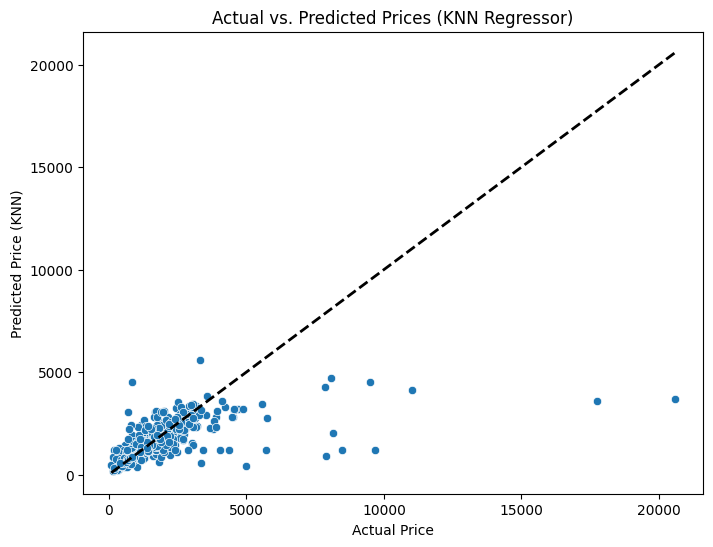

In [37]:
# Add to Cell 4 or in a new cell
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_knn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (KNN)")
plt.title("Actual vs. Predicted Prices (KNN Regressor)")
plt.show()

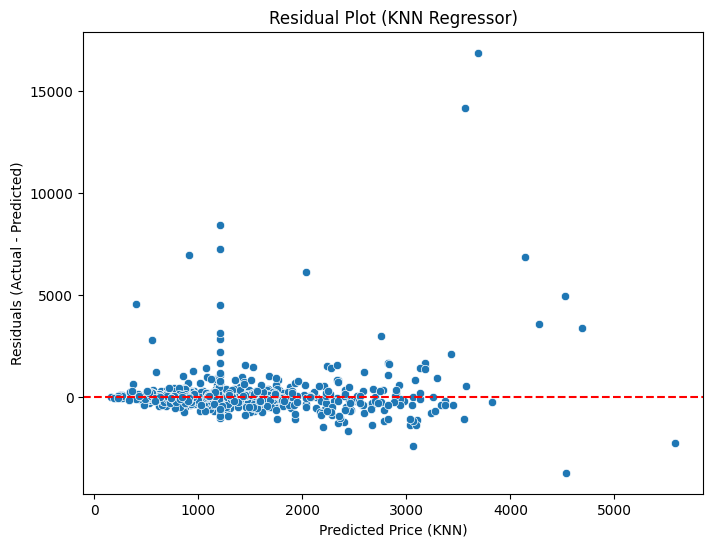

In [38]:
# Add to Cell 4 or in a new cell
residuals_knn = y_test - y_pred_knn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_knn, y=residuals_knn)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price (KNN)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (KNN Regressor)")
plt.show()